# first Milestone:
**(1.Data Collection - 2.Data Exploration - 3.Data Processing - 4.EDA (Exploratory Data Analysis))**


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import plotly.express as px
from Data_helper import *
import gdown
import warnings
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

warnings.filterwarnings('ignore')

In [2]:
pd.options.mode.copy_on_write = True 

## 1. Data Collection

In [3]:
data = pd.read_csv(r"Data/cleaned_SuperStore.csv")
df = pd.read_csv(r"Data/train.csv")

## Mile Stone 2

**Decomposition**

Lets look at the daily and monthy data decomposition for trends and seasonality. We can immediatey see the the trend is upward and heavy seasonality exists.

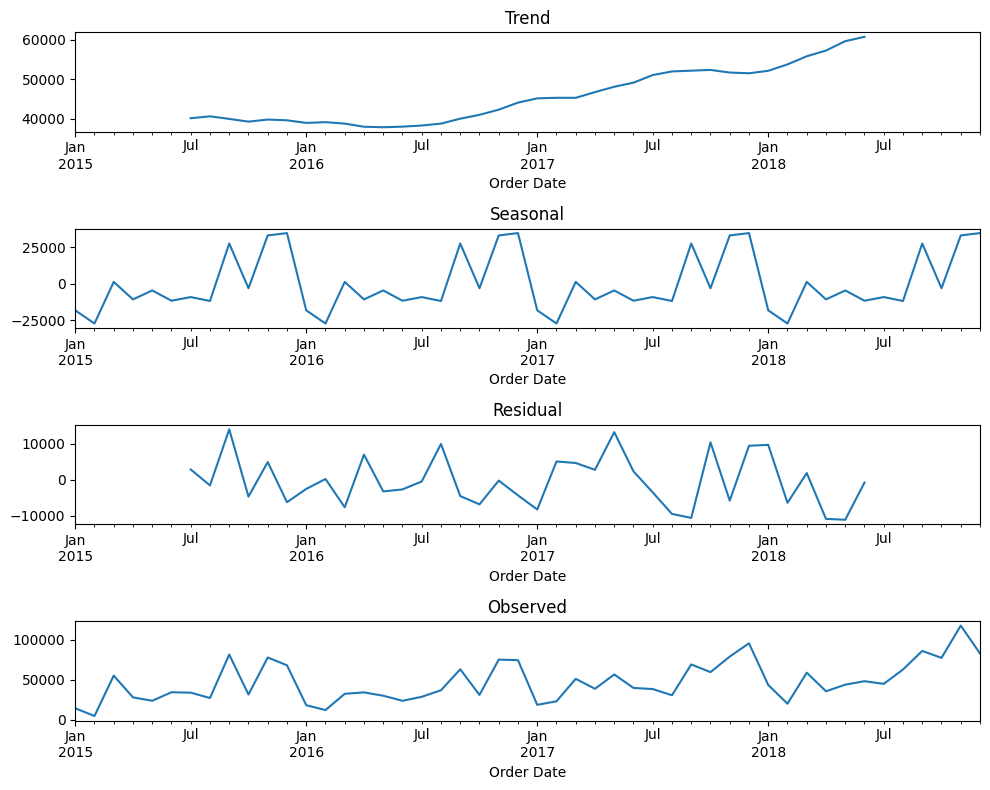

In [4]:
Data_manager_1 = Preprocessing_Pipeline(df)
# Create a copy of the DataFrame to preserve the original "Order Date" column
df_copy = df.copy()

# Ensure 'Order Date' is in datetime format in the copy
df_copy = Data_manager_1.change_to_date('Order Date')

# Set 'Order Date' as the index in the copy
df_copy.set_index('Order Date', inplace=True)

# Resample the data to monthly frequency and sum the sales for each month in the copy
df_monthly = df_copy['Sales'].resample('M').sum()

# Decompose the time series into monthly components
decomposition_monthly = sm.tsa.seasonal_decompose(df_monthly, model='additive')

# Plot the decomposed components
fig, axes = plt.subplots(4, 1, figsize=(10, 8))
decomposition_monthly.trend.plot(ax=axes[0])
axes[0].set_title('Trend')
decomposition_monthly.seasonal.plot(ax=axes[1])
axes[1].set_title('Seasonal')
decomposition_monthly.resid.plot(ax=axes[2])
axes[2].set_title('Residual')
decomposition_monthly.observed.plot(ax=axes[3])
axes[3].set_title('Observed')

plt.tight_layout()
plt.show()

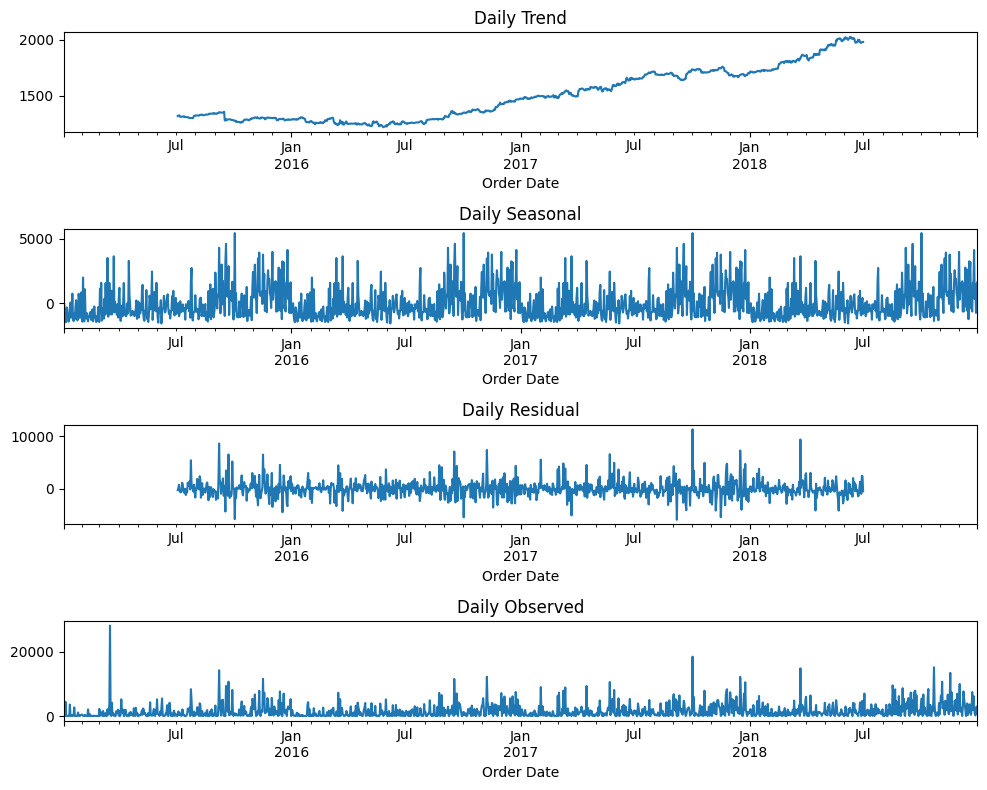

In [5]:
# Resample the data to daily frequency and sum the sales for each day in the copy
df_daily = df_copy['Sales'].resample('D').sum()

# Decompose the time series into daily components
decomposition_daily = sm.tsa.seasonal_decompose(df_daily, model='additive',period=365)

# Plot the decomposed components
fig, axes = plt.subplots(4, 1, figsize=(10, 8))
decomposition_daily.trend.plot(ax=axes[0])
axes[0].set_title('Daily Trend')
decomposition_daily.seasonal.plot(ax=axes[1])
axes[1].set_title('Daily Seasonal')
decomposition_daily.resid.plot(ax=axes[2])
axes[2].set_title('Daily Residual')
decomposition_daily.observed.plot(ax=axes[3])
axes[3].set_title('Daily Observed')

plt.tight_layout()
plt.show()

ACF and PACF plots

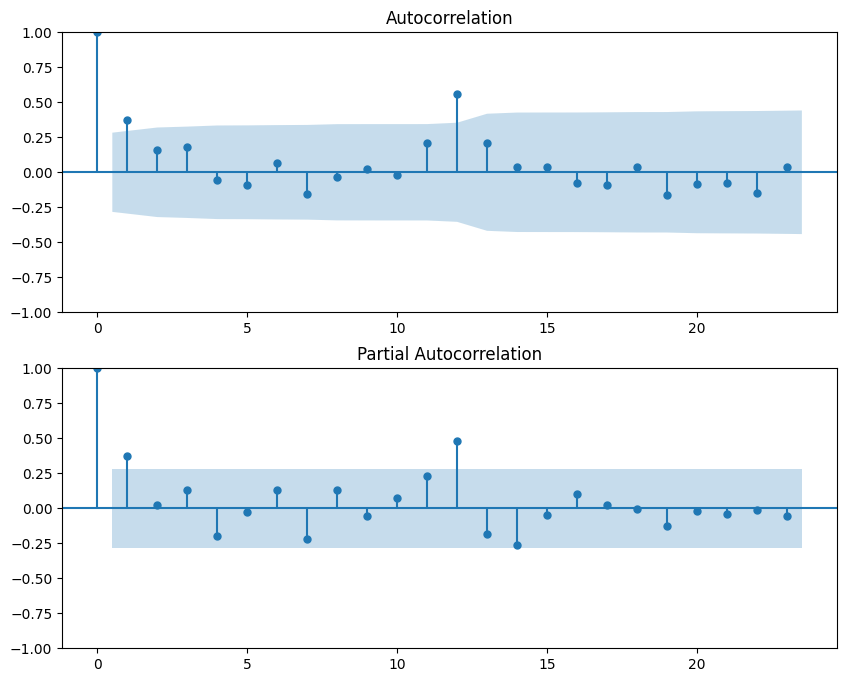

In [6]:
# Create ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(df_monthly, lags=23, ax=ax1)
plot_pacf(df_monthly, lags=23, ax=ax2)

plt.show()

**Checking stationarity on time series**

Augmented Dickey-Fuller (ADF) Test: The ADF test is a statistical test for stationarity. It tests the null hypothesis that a unit root is present in a time series sample. If the p-value from the test is less than a significance level (e.g., 0.05), you can reject the null hypothesis and consider the data stationary.

In time series analysis, stationary data is a fundamental concept. A time series is considered stationary when statistical properties such as the mean, variance, and autocorrelation do not change over time. Here's what it means:

Constant Mean: The mean (average) of the time series data remains constant over time. In other words, the data does not exhibit any significant upward or downward trend.

Constant Variance: The variance (spread or variability) of the data remains constant over time. The data points are equally dispersed around the mean.

Constant Autocorrelation: The autocorrelation, which measures the relationship between data points at different time lags, is constant. This means that the correlation structure does not change with time.

Stationary data is desirable in time series analysis because many statistical methods and models assume stationarity. These models may not perform well on non-stationary data, and the results can be unreliable. Therefore, if a time series is non-stationary, it is often transformed or differenced to achieve stationarity.

There are two types of stationarity:

Strict Stationarity: This is a stronger form of stationarity where the joint probability distribution of the data remains the same regardless of time shifts. All statistical properties, including moments and autocorrelations, are constant.

Trend-Stationarity (Weak Stationarity): In practice, most time series data are not strictly stationary due to external factors. In trend-stationarity, the data may contain a deterministic trend, but the statistical properties of the residuals (after removing the trend) are stationary.

In [7]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Sales'])
p_value = result[1]

if p_value <= 0.05:
    print("Data is stationary")
else:
    print("Data is not stationary")

Data is stationary


# Advanced Visualization

In [8]:
# 1 — Sales Over Time
fig = px.line(data, x="Order Date", y="Sales", color="Category",
              title=" Sales Over Time by Category")
fig.show()


In [9]:
#  4 — Sales by Month & Category
fig = px.bar(data, x="Month", y="Sales", color="Category", barmode="group",
             title=" Monthly Sales by Category")
fig.show()


In [10]:
# 5 — Sub-Category Heatmap by Region
sub_region = data.groupby(["Region","Category"])["Sales"].sum().reset_index()
fig = px.density_heatmap(sub_region, x="Region", y="Category", z="Sales",
                         title=" Sales Heatmap: Category vs Region")
fig.show()


In [11]:
# 6 — Category Sales Growth per Year
cat_year = data.groupby(["Year","Category"])["Sales"].sum().reset_index()
fig = px.line(cat_year, x="Year", y="Sales", color="Category",
              title=" Category Sales Growth Over Years")
fig.show()


In [12]:
# 7 — Sales by State (Map)

# Dictionary: Full state names -> Abbreviations
us_state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX',
    'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Add abbreviation column
state_sales = data.groupby("State")["Sales"].sum().reset_index()
state_sales["State_abbrev"] = state_sales["State"].map(us_state_abbrev)

# Plot with abbreviations
fig = px.choropleth(
    state_sales,
    locations="State_abbrev",
    locationmode="USA-states",
    color="Sales",
    scope="usa",
    title=" Sales Distribution Across States (Fixed)"
)
fig.show()

In [13]:
# 8 — Top 10 Cities by Sales
city_sales = data.groupby("City")["Sales"].sum().nlargest(10).reset_index()
fig = px.bar(city_sales, x="City", y="Sales", title=" Top 10 Cities by Sales")
fig.show()


In [14]:
# 9 — Sales by Region/State (bar)
if 'State' in data.columns and 'Sales' in data.columns:
    state_sales = data.groupby('State', as_index=False)['Sales'].sum().sort_values('Sales', ascending=False).head(25)
    fig = px.bar(state_sales, x='State', y='Sales', title='Top 25 States by Sales')
    fig.update_xaxes(tickangle=45)
    fig.show()
else:
    print("Missing State or Sales")


In [15]:
# 10 — Top 15 Customers by Sales
top_cust = data.groupby('Customer Name', as_index=False)['Sales'].sum().sort_values('Sales', ascending=False).head(5)
fig = px.bar(top_cust.sort_values('Sales'), x='Sales', y='Customer Name',
             orientation='h', title='Top 5 Customers by Sales')
fig.show()


In [16]:
# 12 — Sub-Category Contribution within Categories
subcat_sales = data.groupby(["Category","Sub-Category"])["Sales"].sum().reset_index()
fig = px.treemap(subcat_sales, path=["Category","Sub-Category"], values="Sales",
                 title=" Category vs Sub-Category Contribution to Sales")
fig.show()


# Time Series Analysis
Sales trends across different temporal granularities are visualized in four plots.
*   **Daily Sales Trend:** Depicts the day-to-day fluctuations in sales.
*   **Monthly Sales Trend:** Highlights overarching trends and seasonal patterns in monthly sales volumes.
*   **Quarterly Sales:** A bar chart representation of total sales per quarter, facilitating inter-quarter comparisons.
*   **Average Monthly Sales:** Illustrates the mean sales volume for each month across all years, suggesting potential recurring monthly seasonality.

In [17]:
# Create time series dataset
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Aggregate sales by different time periods

# Daily sales
daily_sales = data.groupby('Order Date')['Sales'].sum()

# Monthly sales
monthly_sales = data.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales'].sum()

# Quarterly sales
quarterly_sales = data.groupby(pd.Grouper(key='Order Date', freq='Q'))['Sales'].sum()

print(f"Time period: {data['Order Date'].min()} to {data['Order Date'].max()}")
print(f"Total days: {len(daily_sales)}")
print(f"Total months: {len(monthly_sales)}")

Time period: 2015-01-03 00:00:00 to 2018-12-30 00:00:00
Total days: 1458
Total months: 48


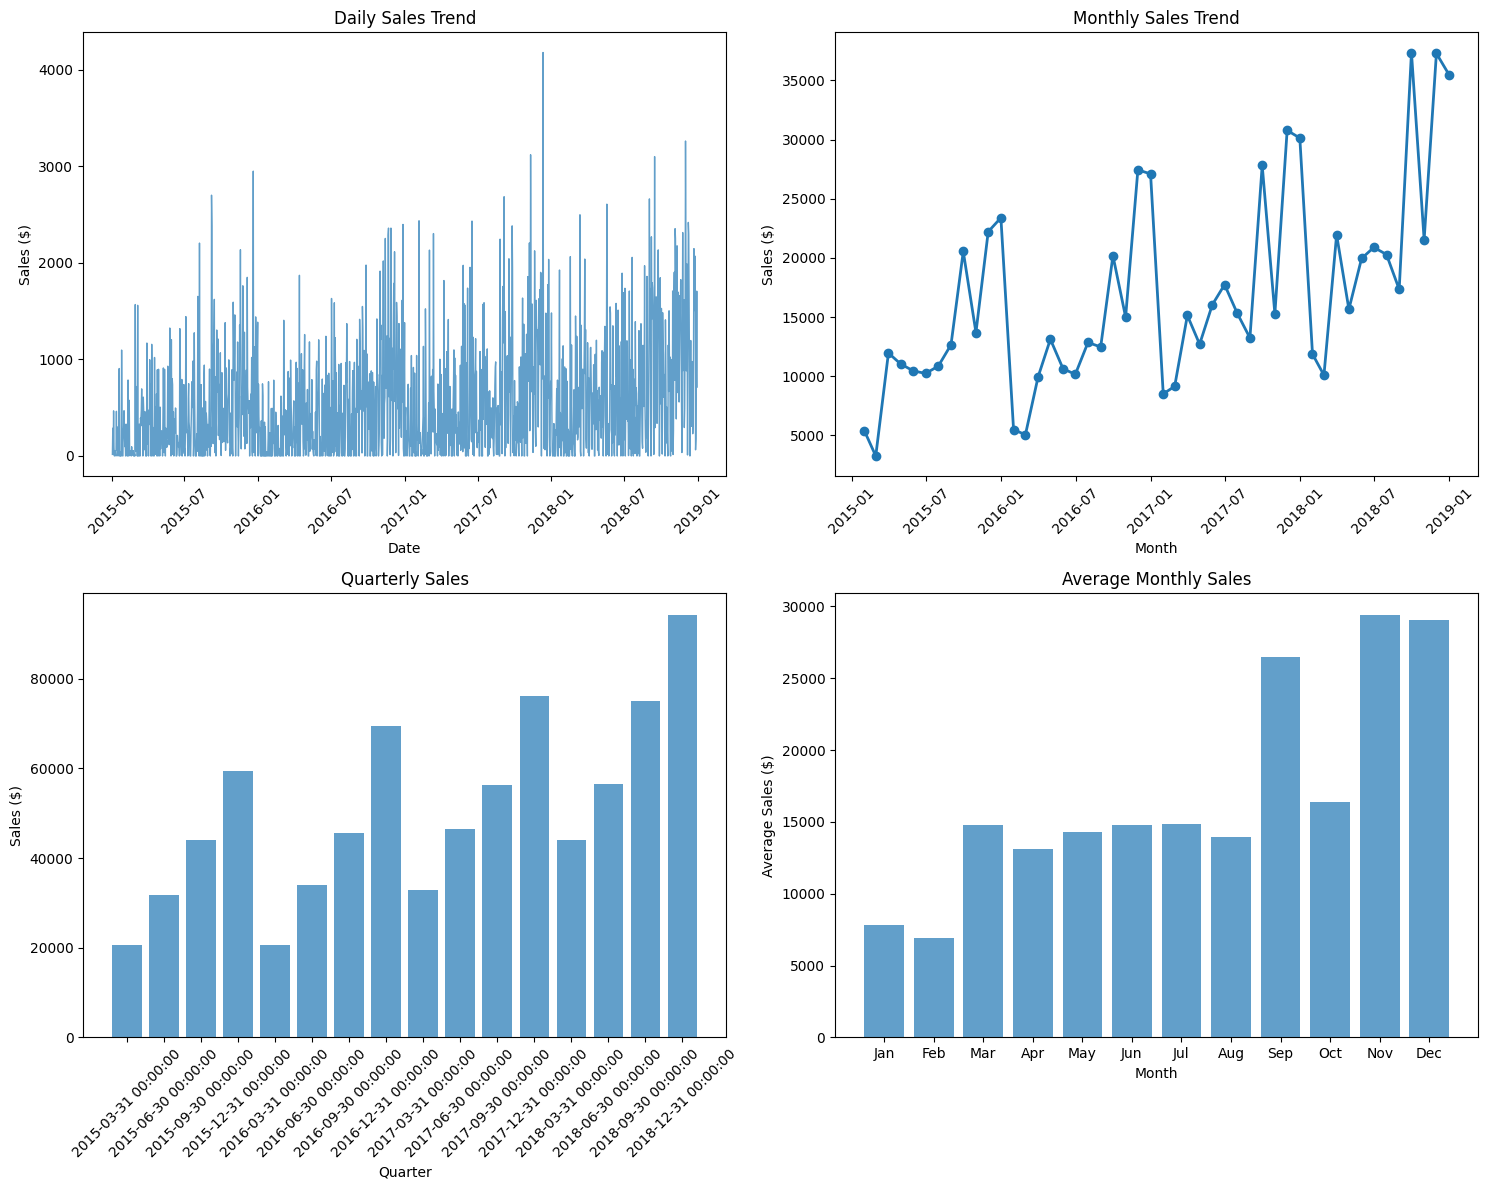

In [18]:
# Plot 1: Overall sales trend
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Daily sales trend
axes[0,0].plot(daily_sales.index, daily_sales.values, linewidth=1, alpha=0.7)
axes[0,0].set_title('Daily Sales Trend')
axes[0,0].set_xlabel('Date')
axes[0,0].set_ylabel('Sales ($)')
axes[0,0].tick_params(axis='x', rotation=45)

# Monthly sales trend
axes[0,1].plot(monthly_sales.index, monthly_sales.values, marker='o', linewidth=2)
axes[0,1].set_title('Monthly Sales Trend')
axes[0,1].set_xlabel('Month')
axes[0,1].set_ylabel('Sales ($)')
axes[0,1].tick_params(axis='x', rotation=45)

# Quarterly sales
axes[1,0].bar(quarterly_sales.index.strftime('%Y-Q%q'), quarterly_sales.values, alpha=0.7)
axes[1,0].set_title('Quarterly Sales')
axes[1,0].set_xlabel('Quarter')
axes[1,0].set_ylabel('Sales ($)')
axes[1,0].tick_params(axis='x', rotation=45)

# Sales distribution by month
monthly_avg = monthly_sales.groupby(monthly_sales.index.month).mean()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[1,1].bar(months, monthly_avg, alpha=0.7)
axes[1,1].set_title('Average Monthly Sales')
axes[1,1].set_xlabel('Month')
axes[1,1].set_ylabel('Average Sales ($)')

plt.tight_layout()
plt.show()

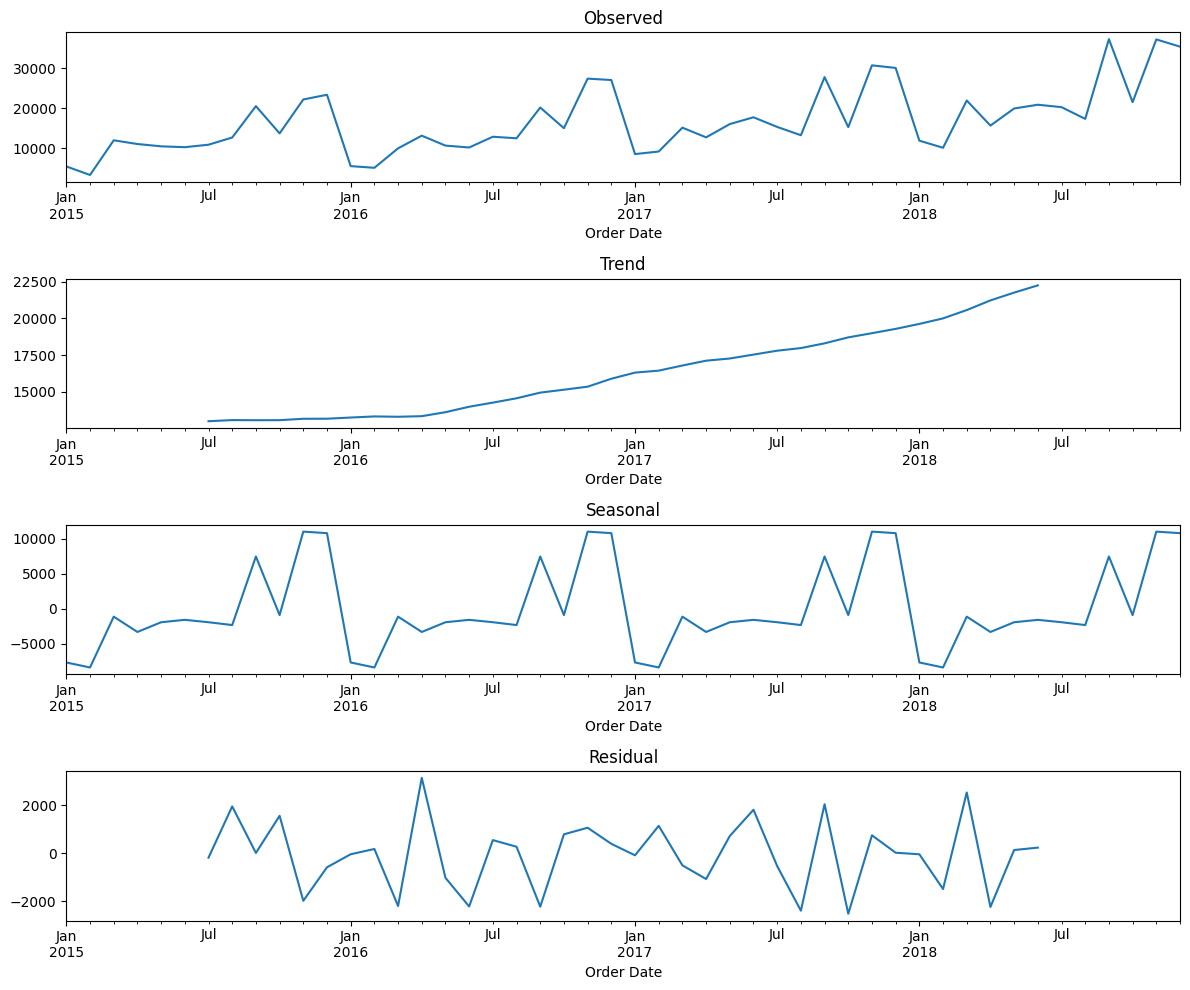

In [19]:
# Seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Use monthly data for decomposition
monthly_df = pd.DataFrame(monthly_sales)
monthly_df.columns = ['Sales']

# Perform decomposition
decomposition = seasonal_decompose(monthly_df['Sales'], model='additive', period=12)

# Plot decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 10))

decomposition.observed.plot(ax=axes[0], title='Observed')
decomposition.trend.plot(ax=axes[1], title='Trend')
decomposition.seasonal.plot(ax=axes[2], title='Seasonal')
decomposition.resid.plot(ax=axes[3], title='Residual')

plt.tight_layout()
plt.show()

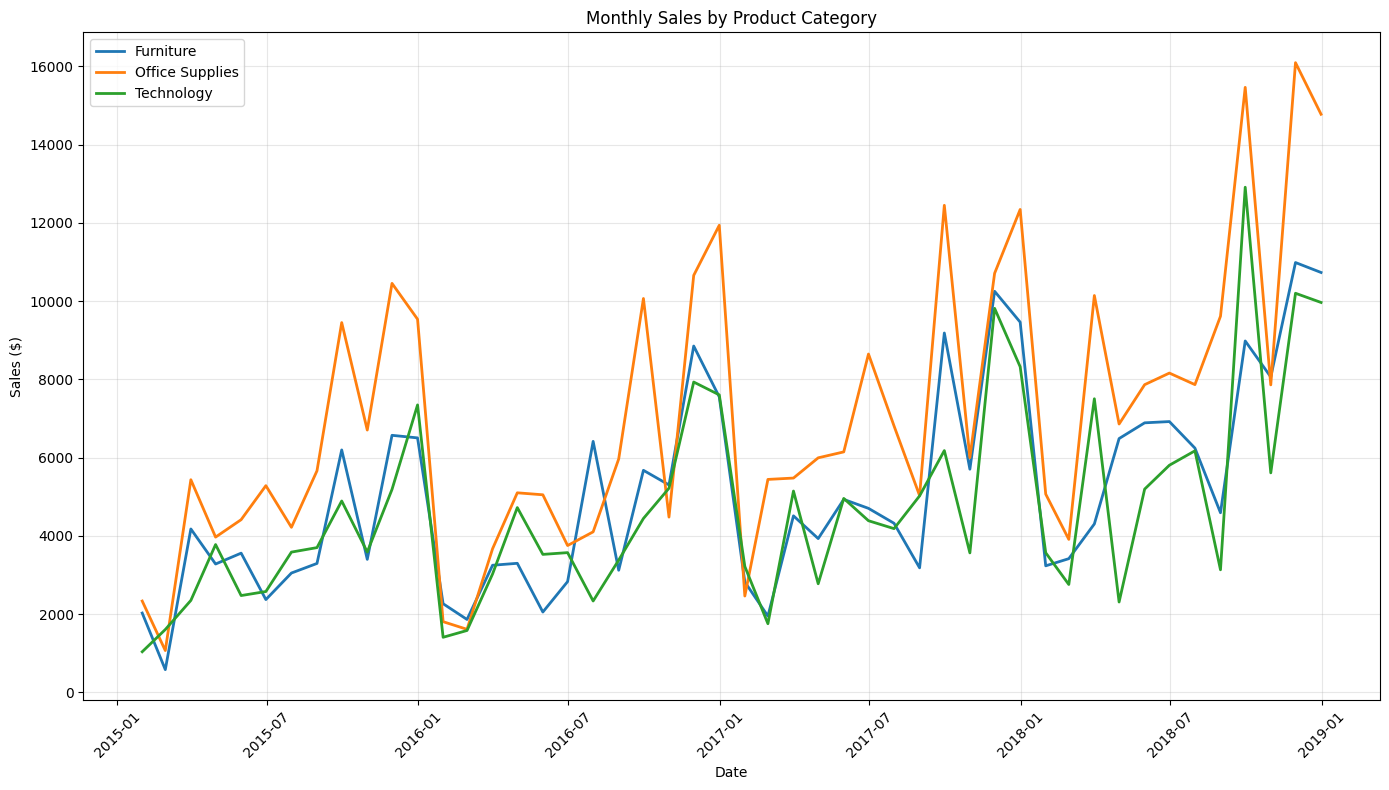

In [20]:
# Sales by category over time
category_sales = data.groupby([pd.Grouper(key='Order Date', freq='M'), 'Category'])['Sales'].sum().unstack()

plt.figure(figsize=(14, 8))
for category in category_sales.columns:
    plt.plot(category_sales.index, category_sales[category], label=category, linewidth=2)

plt.title('Monthly Sales by Product Category')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

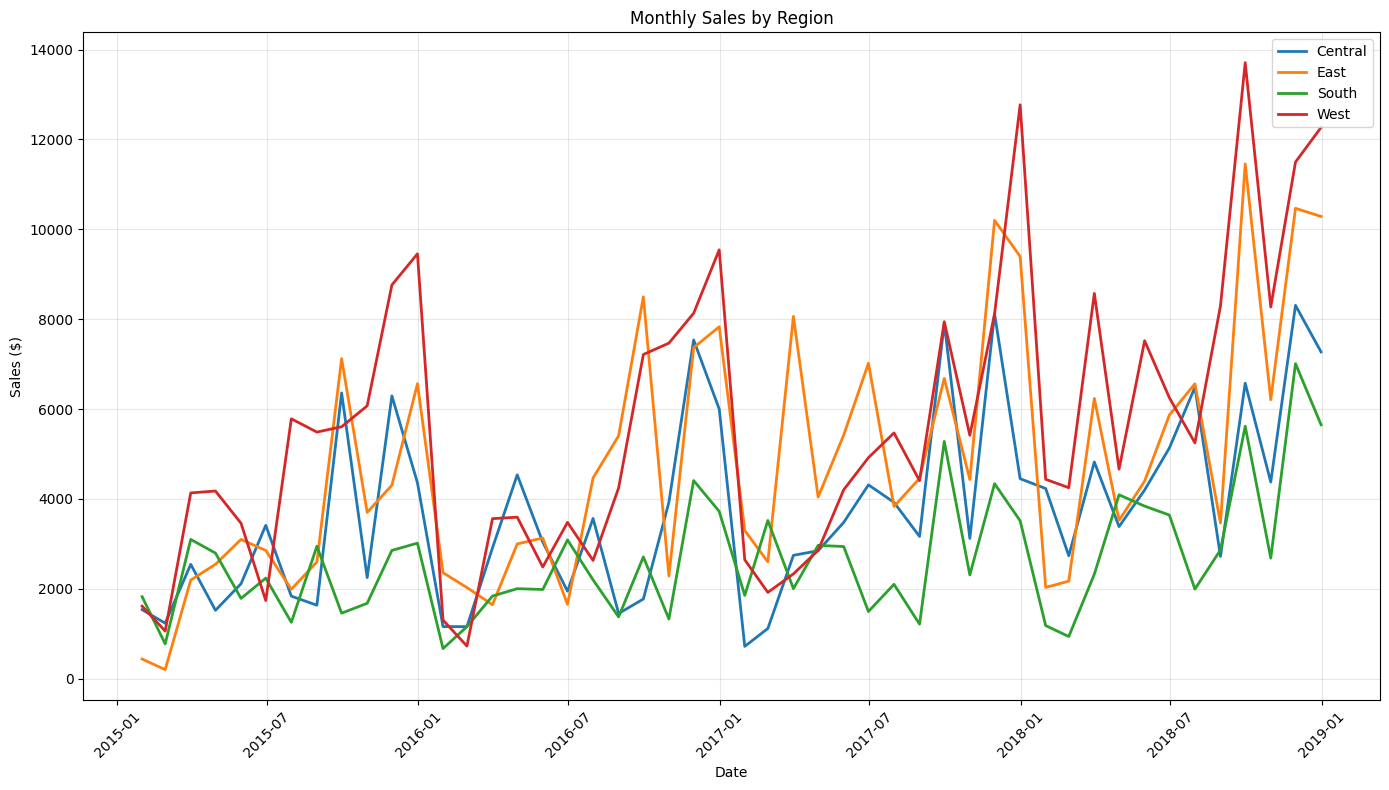

In [21]:
# Regional sales analysis
regional_sales = data.groupby([pd.Grouper(key='Order Date', freq='M'), 'Region'])['Sales'].sum().unstack()

plt.figure(figsize=(14, 8))
for region in regional_sales.columns:
    plt.plot(regional_sales.index, regional_sales[region], label=region, linewidth=2)

plt.title('Monthly Sales by Region')
plt.xlabel('Date')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

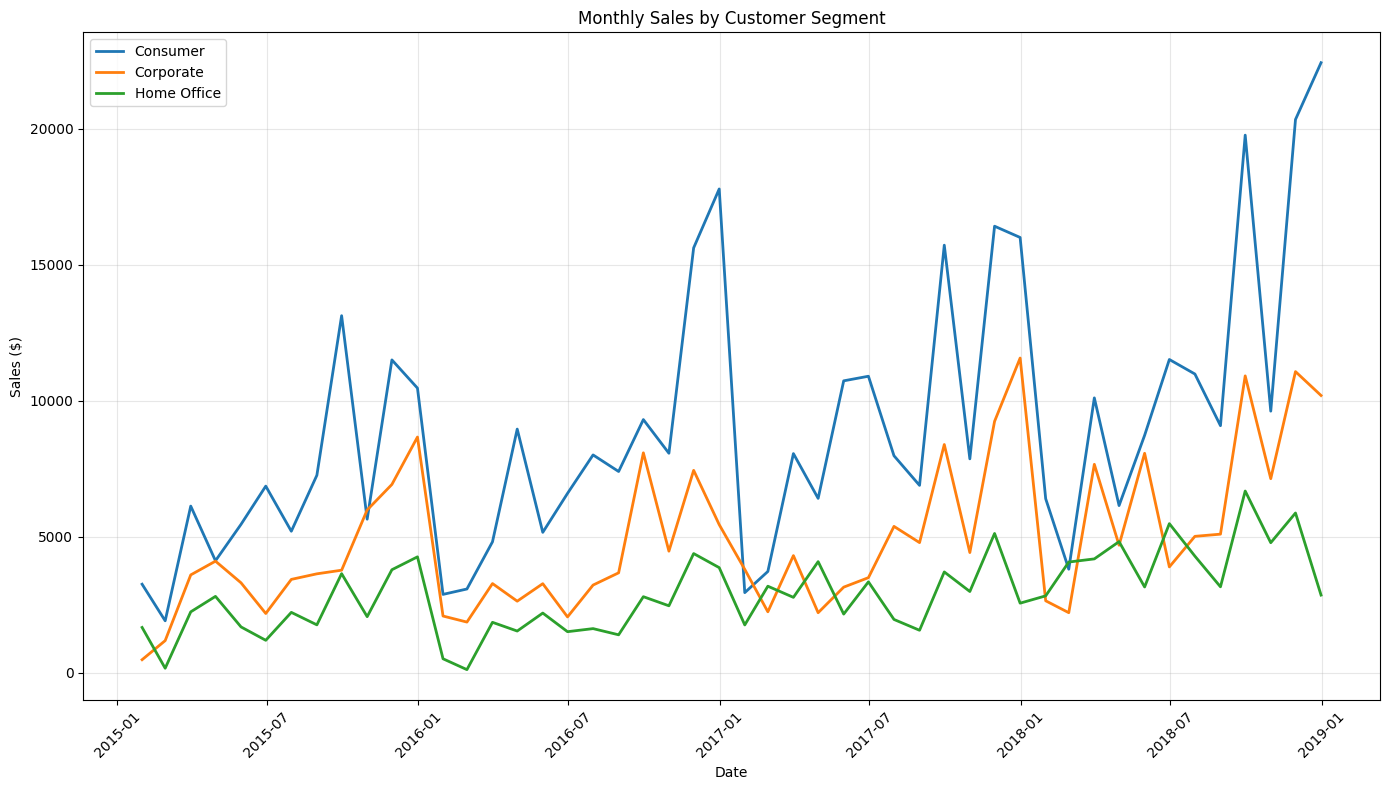

In [22]:
# Customer segment analysis over time
segment_sales = data.groupby([pd.Grouper(key='Order Date', freq='M'), 'Segment'])['Sales'].sum().unstack()

plt.figure(figsize=(14, 8))
for segment in segment_sales.columns:
    plt.plot(segment_sales.index, segment_sales[segment], label=segment, linewidth=2)

plt.title('Monthly Sales by Customer Segment')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
# Time series forecasting preparation
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Check stationarity
def check_stationarity(timeseries):
    # Perform Dickey-Fuller test
    result = adfuller(timeseries.dropna())
    print('ADF Statistic: {:.6f}'.format(result[0]))
    print('p-value: {:.6f}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {:.3f}'.format(key, value))

    if result[1] <= 0.05:
        print("Series is stationary")
    else:
        print("Series is not stationary")

print("Stationarity check for monthly sales:")
check_stationarity(monthly_sales)

Stationarity check for monthly sales:
ADF Statistic: -3.842825
p-value: 0.002498
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601
Series is stationary


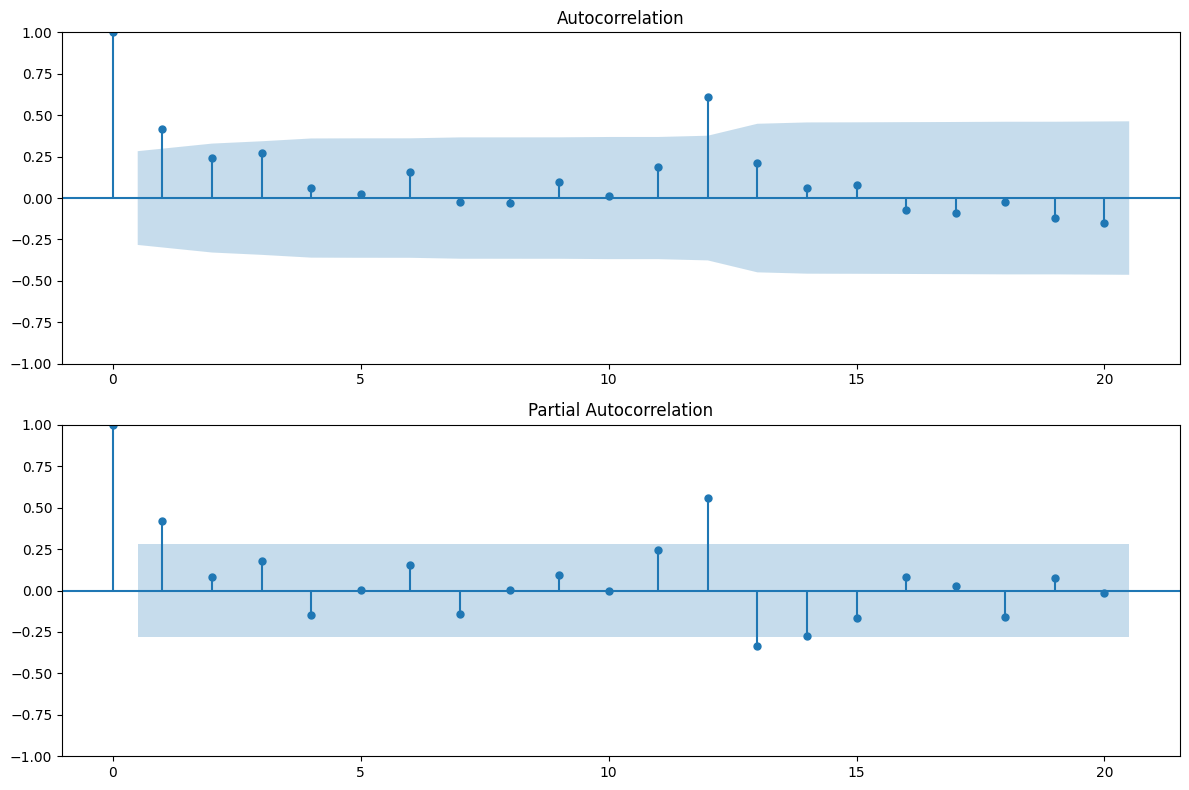

In [24]:
# ACF and PACF plots
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(monthly_sales, ax=axes[0], lags=20)
plot_pacf(monthly_sales, ax=axes[1], lags=20)

plt.tight_layout()
plt.show()

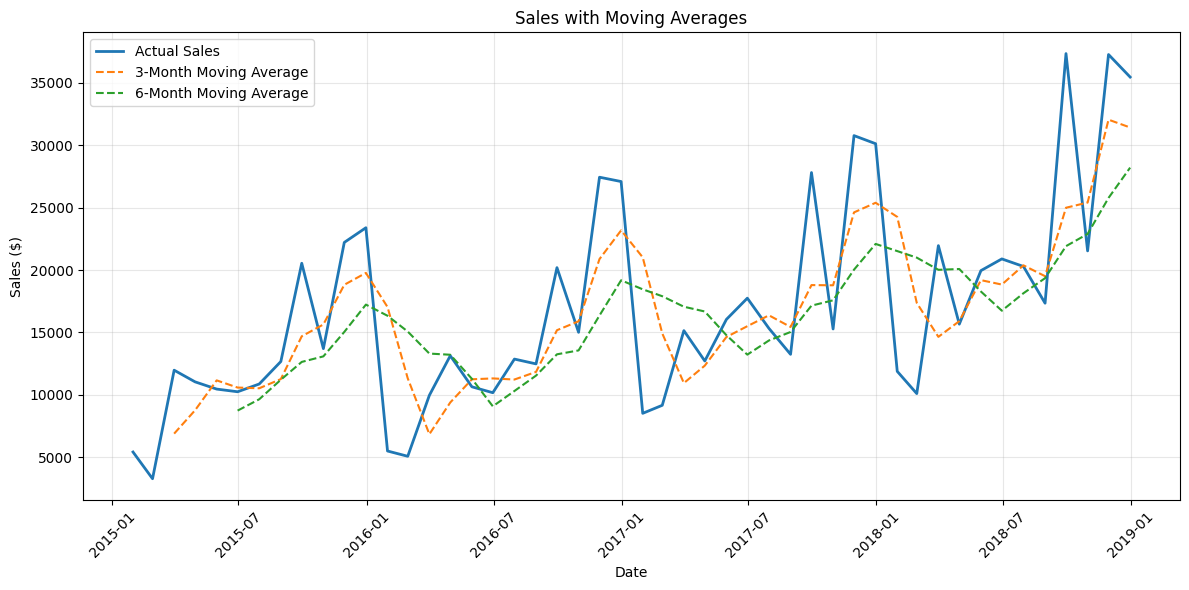

In [25]:
# Simple forecasting with moving averages
# Create a copy of monthly sales for forecasting
forecast_df = monthly_df.copy()

# Calculate moving averages
forecast_df['MA_3'] = forecast_df['Sales'].rolling(window=3).mean()
forecast_df['MA_6'] = forecast_df['Sales'].rolling(window=6).mean()

plt.figure(figsize=(12, 6))
plt.plot(forecast_df.index, forecast_df['Sales'], label='Actual Sales', linewidth=2)
plt.plot(forecast_df.index, forecast_df['MA_3'], label='3-Month Moving Average', linestyle='--')
plt.plot(forecast_df.index, forecast_df['MA_6'], label='6-Month Moving Average', linestyle='--')
plt.title('Sales with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

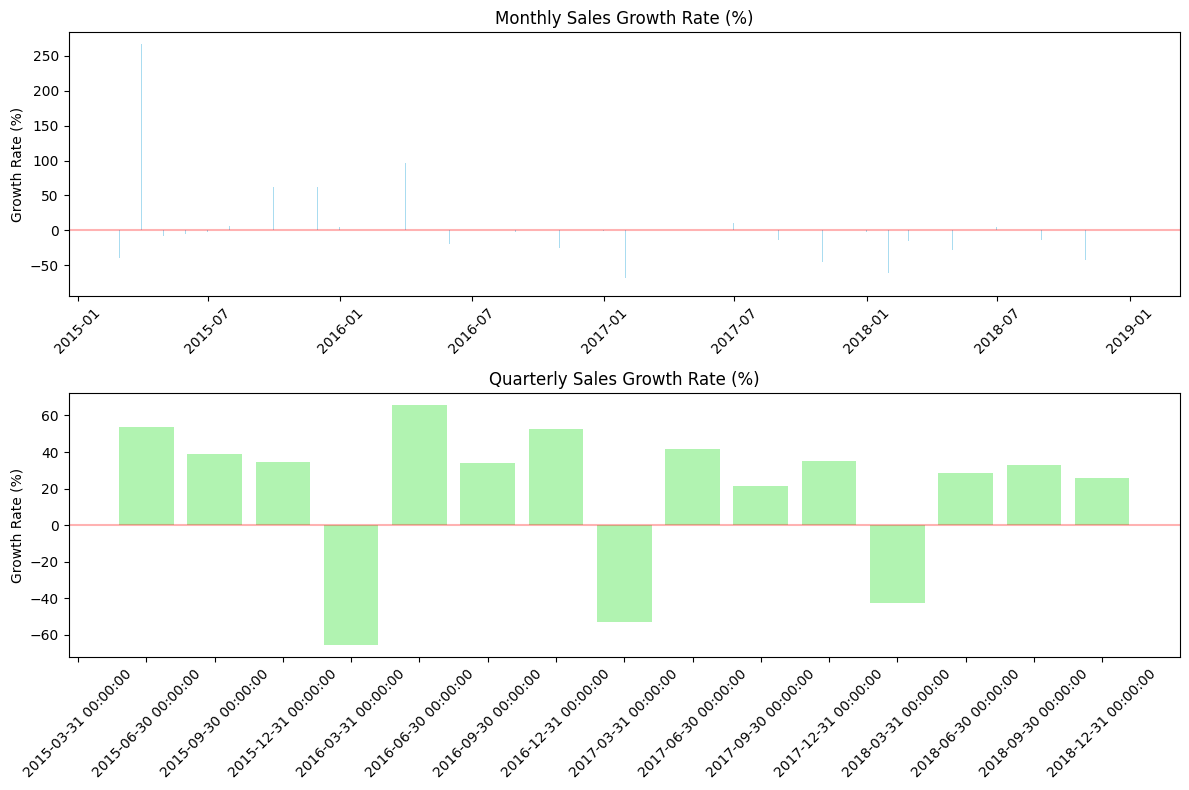

Average monthly growth rate: 17.55%
Average quarterly growth rate: 20.28%


In [26]:
# Growth rate analysis
monthly_growth = monthly_sales.pct_change() * 100
quarterly_growth = quarterly_sales.pct_change() * 100

fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Monthly growth
axes[0].bar(monthly_growth.index, monthly_growth.values, alpha=0.7, color='skyblue')
axes[0].axhline(y=0, color='red', linestyle='-', alpha=0.3)
axes[0].set_title('Monthly Sales Growth Rate (%)')
axes[0].set_ylabel('Growth Rate (%)')
axes[0].tick_params(axis='x', rotation=45)

# Quarterly growth
axes[1].bar(quarterly_growth.index.strftime('%Y-Q%q'), quarterly_growth.values,
           alpha=0.7, color='lightgreen')
axes[1].axhline(y=0, color='red', linestyle='-', alpha=0.3)
axes[1].set_title('Quarterly Sales Growth Rate (%)')
axes[1].set_ylabel('Growth Rate (%)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print(f"Average monthly growth rate: {monthly_growth.mean():.2f}%")
print(f"Average quarterly growth rate: {quarterly_growth.mean():.2f}%")

In [27]:
# Key performance metrics
print("=== TIME SERIES ANALYSIS SUMMARY ===")
print(f"Analysis Period: {data['Order Date'].min().strftime('%Y-%m-%d')} to {data['Order Date'].max().strftime('%Y-%m-%d')}")
print(f"Total Sales: ${data['Sales'].sum():,.2f}")
print(f"Average Monthly Sales: ${monthly_sales.mean():,.2f}")
print(f"Best Month: {monthly_sales.idxmax().strftime('%Y-%m')} (${monthly_sales.max():,.2f})")
print(f"Worst Month: {monthly_sales.idxmin().strftime('%Y-%m')} (${monthly_sales.min():,.2f})")
print(f"Sales Volatility (Std Dev): ${monthly_sales.std():,.2f}")

# Seasonal strength
seasonal_strength = decomposition.seasonal.std() / decomposition.observed.std()
print(f"Seasonal Strength: {seasonal_strength:.3f}")

=== TIME SERIES ANALYSIS SUMMARY ===
Analysis Period: 2015-01-03 to 2018-12-30
Total Sales: $806,761.37
Average Monthly Sales: $16,807.53
Best Month: 2018-09 ($37,356.32)
Worst Month: 2015-02 ($3,263.67)
Sales Volatility (Std Dev): $8,363.44
Seasonal Strength: 0.743


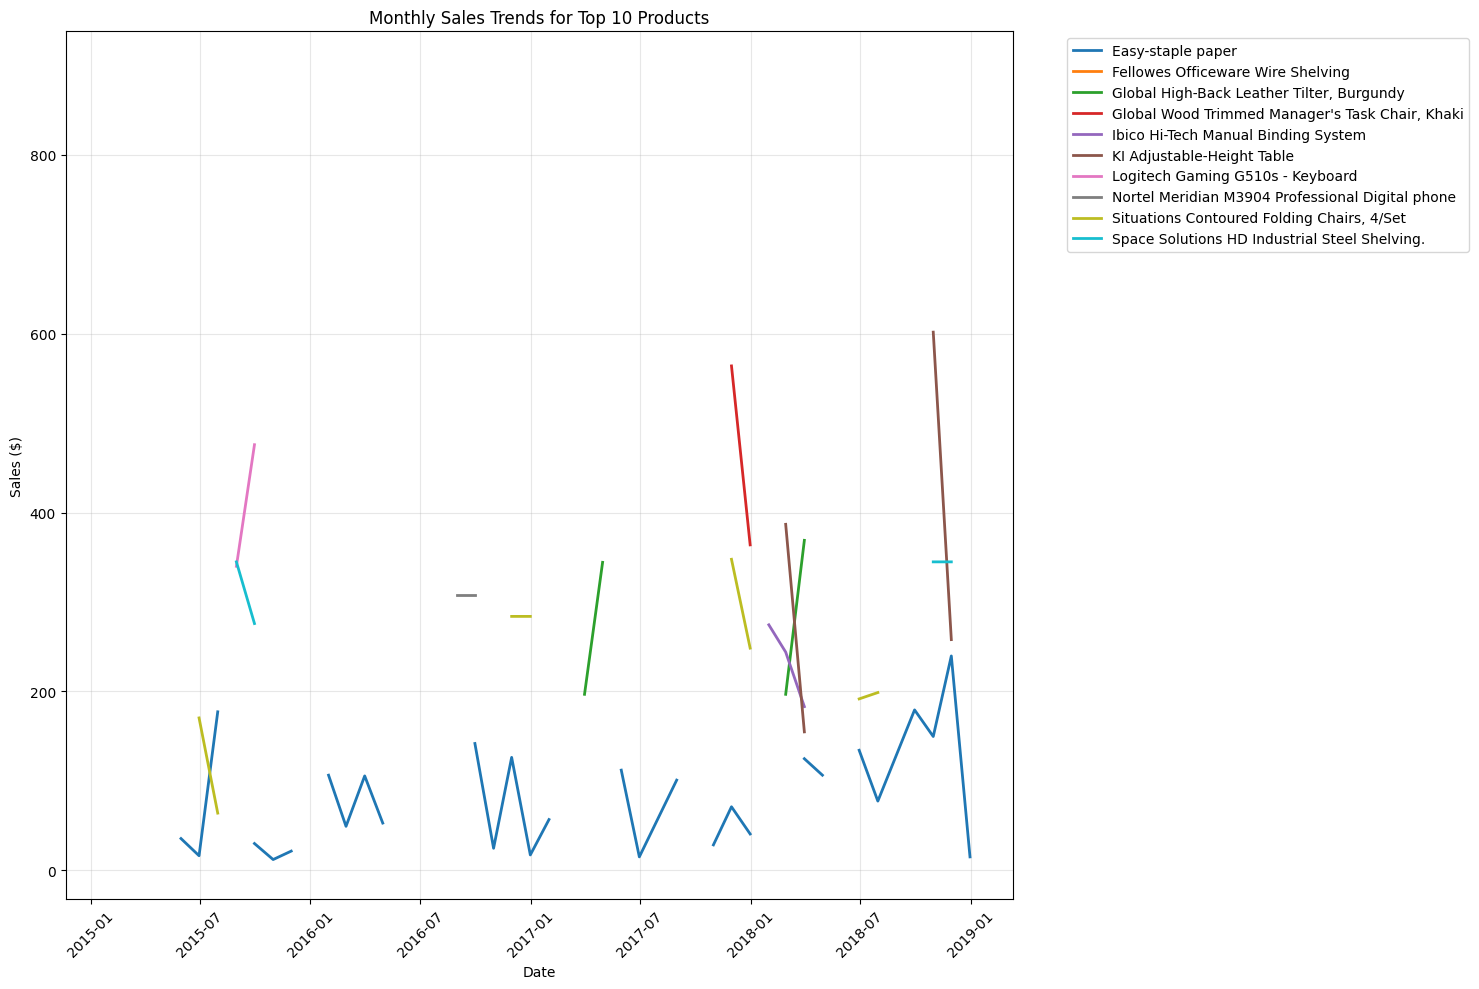

In [28]:
# Top performing products over time
# Get top 10 products by total sales
top_products = data.groupby('Product Name')['Sales'].sum().nlargest(10).index

# Create time series for top products
product_trends = data[data['Product Name'].isin(top_products)].groupby(
    [pd.Grouper(key='Order Date', freq='M'), 'Product Name']
)['Sales'].sum().unstack()

plt.figure(figsize=(15, 10))
for product in product_trends.columns:
    plt.plot(product_trends.index, product_trends[product], label=product, linewidth=2)

plt.title('Monthly Sales Trends for Top 10 Products')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusion

The time series analysis of the SuperStore sales data from 2015 to 2018 reveals significant temporal patterns and key insights. The overall sales trend exhibits a clear seasonality, with peaks typically occurring towards the end of the year, particularly in November and December. This is further supported by the seasonal decomposition, which highlights a strong seasonal component.

The analysis by product category shows that Technology and Office Supplies generally contribute more to overall sales compared to Furniture, and all categories follow a similar seasonal pattern. Regionally, the West and East regions consistently show higher sales volumes. Customer segment analysis indicates that the Consumer segment generates the highest sales.

The monthly sales time series was found to be stationary based on the Augmented Dickey-Fuller test, which is a positive indication for applying various time series forecasting models. The ACF and PACF plots provide initial insights into potential model parameters for future forecasting efforts.

Moving averages offer a smoothed view of the sales trend, and the growth rate analysis reveals fluctuations in monthly and quarterly sales, with an overall positive average growth rate.

In summary, the SuperStore sales data exhibits strong seasonality and growth over the analyzed period, with variations across product categories, regions, and customer segments. These findings can inform strategic decisions related to inventory management, marketing campaigns, and resource allocation to capitalize on peak seasons and address areas for growth.

<Axes: xlabel='Region', ylabel='count'>

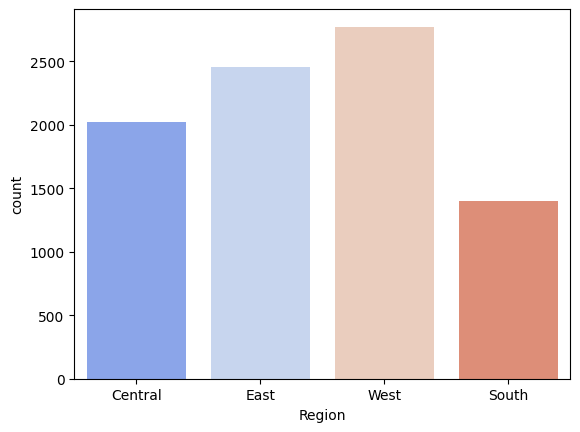

In [29]:
## Region by shipmode
sns.countplot(x=data["Region"],palette="coolwarm")

In [30]:
fig = px.histogram(
    data,
    x="Region",
    color="Ship Mode",
    barmode="group",     # grouped bars like seaborn countplot
    color_discrete_sequence=px.colors.diverging.RdBu  # similar to coolwarm
)

fig.update_layout(
    title="Region vs Ship Mode (Interactive Countplot)",
    xaxis_title="Region",
    yaxis_title="Count",
    bargap=0.2
)

fig.show()

In [31]:
## Sub_Category
fig = px.histogram(
    data,
    x="Sub-Category",
    color="Sub-Category",
    color_discrete_sequence=px.colors.qualitative.Set2   # alternative to Paired
)

fig.update_layout(
    title="Count of Sub-Category (Interactive)",
    xaxis_title="Sub-Category",
    yaxis_title="Count",
    xaxis_tickangle=-90,
    showlegend=False
)

fig.show()

In [32]:
## Sub category by sales
fig = px.strip(
    data,
    x="Sub-Category",
    y="Sales",
    color="Sub-Category",   # optional for color distinction
    stripmode="overlay"     # "overlay" or "group"
)

fig.update_layout(
    title="Sales Distribution per Sub-Category",
    xaxis_title="Sub-Category",
    yaxis_title="Sales",
    xaxis_tickangle=-90,
    showlegend=False
)

fig.show()

In [33]:
fig = px.box(
    data,
    title="Sales Distribution per Sub-Category",
    x="Sub-Category",
    y="Sales",
    color="Sub-Category"
)
fig.update_layout(xaxis_tickangle=-90)
fig.show()
